https://www.kaggle.com/datasets/whenamancodes/ideal-customer-analysis-personality-test

# People:
* ID: Customer's unique identifier
* Year_Birth: Customer's birth year
* Education: Customer's education level
* Marital_Status: Customer's marital status
* Income: Customer's yearly household income
* Kidhome: Number of children in customer's household
* Teenhome: Number of teenagers in customer's household
* Dt_Customer: Date of customer's enrollment with the company
* Recency: Number of days since customer's last purchase
* Complain: 1 if the customer complained in the last 2 years, 0 otherwise

# Products:
* MntWines: Amount spent on wine in last 2 years
* MntFruits: Amount spent on fruits in last 2 years
* MntMeatProducts: Amount spent on meat in last 2 years
* MntFishProducts: Amount spent on fish in last 2 years
* MntSweetProducts: Amount spent on sweets in last 2 years
* MntGoldProds: Amount spent on gold in last 2 years

# Promotion:
* NumDealsPurchases: Number of purchases made with a discount
* AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
* AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
* AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
* AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
* AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
* Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

# Place:
* NumWebPurchases: Number of purchases made through the company’s website
* NumCatalogPurchases: Number of purchases made using a catalogue
* NumStorePurchases: Number of purchases made directly in stores
* NumWebVisitsMonth: Number of visits to company’s website in the last month

In [112]:
import pandas as pd

# pandas separator tab

df= pd.read_csv("marketing_campaign.csv", sep="\t")

df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


# data cleaning

* umbenennen der Spalten
* Zahlen, die als String gespeichert sind, konvertieren und ggf. String-Teile entfernen
* fehlerhafte Einträge entfernen (z.B. wenn überall oder fast überall null steht)
* ggf. neue Spalten aus vorhandenen Daten erstellen
* Datentypen überprüfen und ggf. ändern
* Spalten entfernen, die für die Auswertung keine Rolle spielen
* Fehlende Werte auffüllen (z.B. mit dem Mean)

In [113]:
# rename cols to lowercase
df.columns=df.columns.str.lower()
df.head()

,id,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mntwines,...,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,z_costcontact,z_revenue,response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [114]:
df.info()

# add

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
id                     2240 non-null int64
year_birth             2240 non-null int64
education              2240 non-null object
marital_status         2240 non-null object
income                 2216 non-null float64
kidhome                2240 non-null int64
teenhome               2240 non-null int64
dt_customer            2240 non-null object
recency                2240 non-null int64
mntwines               2240 non-null int64
mntfruits              2240 non-null int64
mntmeatproducts        2240 non-null int64
mntfishproducts        2240 non-null int64
mntsweetproducts       2240 non-null int64
mntgoldprods           2240 non-null int64
numdealspurchases      2240 non-null int64
numwebpurchases        2240 non-null int64
numcatalogpurchases    2240 non-null int64
numstorepurchases      2240 non-null int64
numwebvisitsmonth      2240 non-null int64
acceptedcmp3           2240 

## bei income fehlen 24 Einträge, was tun?

Variante 1: Rows entfernen, da income eine wichtige Information ist, die fehlt
Variante 2: Fehlende Incomes durch das Mean-Income ersetzen. So bleiben die übrigen Informationen im Datensatz erhalten

In [115]:
# remove rows with missing income
df.dropna(subset=["income"], inplace=True)

In [116]:
# show all columns with object datatype
df.select_dtypes(include="object").columns

Index(['education', 'marital_status', 'dt_customer'], dtype='object')

Datentypen passen überall

In [117]:
# add neu Column children_count with the sum of kidhome and teenhome
df["children_count"]=df["kidhome"]+df["teenhome"]

ID ist keine relevate Information für die Auswertung, kann entfernt werden

In [118]:
# drop id column
df.drop("id", axis=1, inplace=True)

## Datacleaning abgeschlossen

# explorative Datenvisualisierung

In [119]:
import matplotlib.pyplot as plt

In [120]:
df.head()

,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mntwines,mntfruits,...,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,z_costcontact,z_revenue,response,children_count
0,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,...,0,0,0,0,0,0,3,11,1,0
1,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,...,0,0,0,0,0,0,3,11,0,2
2,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,...,0,0,0,0,0,0,3,11,0,0
3,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,...,0,0,0,0,0,0,3,11,0,1
4,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,...,0,0,0,0,0,0,3,11,0,1


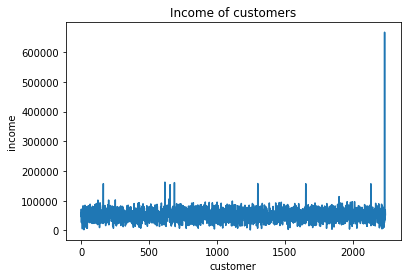

In [121]:
plt.plot(df["income"])
plt.xlabel("customer")
plt.ylabel("income")
plt.title("Income of customers")
plt.show()

Der Chart macht so aber wenig Sinn (wir brauchten halt einen Line-Chart)

In [122]:
df["dt_customer"].dtype

dtype('O')

In [123]:
# convert dt_customer to datetime
df["dt_customer"]=pd.to_datetime(df["dt_customer"])

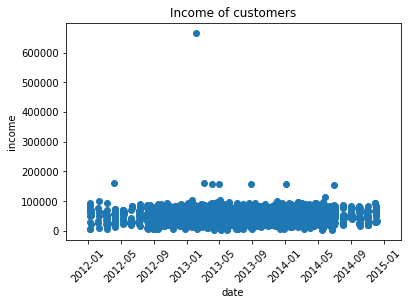

In [124]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# scatter plot with dt_customer and income
plt.scatter(df["dt_customer"], df["income"])
plt.xlabel("date")
# rotate xticks
plt.xticks(rotation=45)
plt.ylabel("income")
plt.title("Income of customers")
plt.show()


Aussage dieser Grafik:

* Es gibt KEINEN Zusammenhang zwischen dem Datum der Anmeldung und dem Einkommen
* Offensichtlich gibt es einen Outlier, der ein sehr hohes Einkommen hat (den müssen wir noch bereinigen). Ist aber eigentlich nicht der Job dieser Grafik sowas zu finden

In [125]:
# remove outlier
df=df[df["income"]<300000]

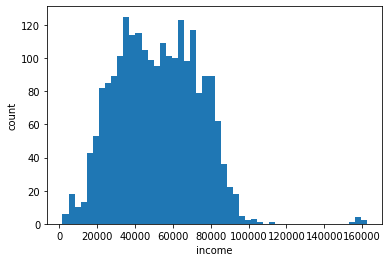

In [126]:
# histogram of income
plt.hist(df["income"], bins=50)
plt.xlabel("income")
plt.ylabel("count")
plt.show()


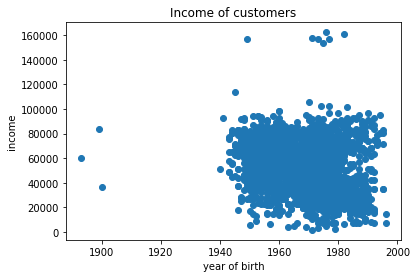

In [127]:
# scatter plot with year_birth and income
plt.scatter(df["year_birth"], df["income"])
plt.xlabel("year of birth")
plt.ylabel("income")
plt.title("Income of customers")
plt.show()

In [128]:
# remove rows with year_birth < 1910
df=df[df["year_birth"]>=1910]

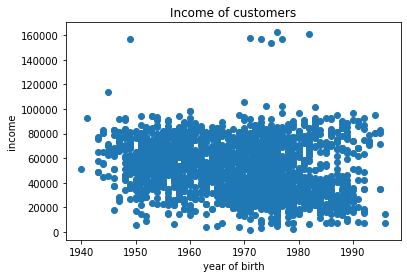

In [129]:
# scatter plot with year_birth and income
plt.scatter(df["year_birth"], df["income"])
plt.xlabel("year of birth")
plt.ylabel("income")
plt.title("Income of customers")
plt.show()

In [130]:
# print pearson correlation coefficient between year_birth and income
df["year_birth"].corr(df["income"])

-0.1999766464388071

In [131]:
df.head()

,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mntwines,mntfruits,...,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,z_costcontact,z_revenue,response,children_count
0,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,88,...,0,0,0,0,0,0,3,11,1,0
1,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,1,...,0,0,0,0,0,0,3,11,0,2
2,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,...,0,0,0,0,0,0,3,11,0,0
3,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,4,...,0,0,0,0,0,0,3,11,0,1
4,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,...,0,0,0,0,0,0,3,11,0,1


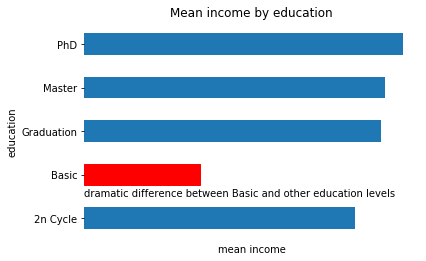

In [132]:
# plot a barh chart with the mean income of customers by education
df.groupby("education")["income"].mean().plot(kind="barh")
plt.xlabel("mean income")
plt.ylabel("education")
plt.title("Mean income by education")
# mark the "Basic" Chart red
plt.gca().get_children()[1].set_color("red")
# subtitle
plt.text(0, 0.5, "dramatic difference between Basic and other education levels")
# remove all borders
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["bottom"].set_visible(False)
plt.gca().spines["left"].set_visible(False)
# remove xticks
plt.xticks([])
# make bars thinner
plt.gca().patches[0].set_linewidth(0.2)
plt.show()

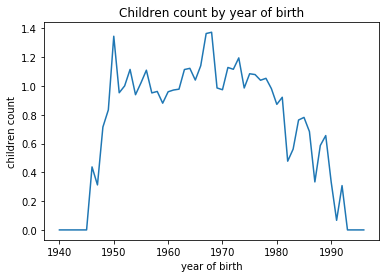

In [133]:
# plot a line chart with year_birth and children_count
children_by_year_of_birth=df.groupby("year_birth")["children_count"].mean()
plt.plot(children_by_year_of_birth)
plt.xlabel("year of birth")
plt.ylabel("children count")
plt.title("Children count by year of birth")
plt.show()

In [134]:
children_by_year_of_birth

year_birth
1940    0.000000
1941    0.000000
1943    0.000000
1944    0.000000
1945    0.000000
1946    0.437500
1947    0.312500
1948    0.714286
1949    0.833333
1950    1.344828
1951    0.952381
1952    1.000000
1953    1.114286
1954    0.938776
1955    1.020833
1956    1.109091
1957    0.951220
1958    0.961538
1959    0.880000
1960    0.959184
1961    0.971429
1962    0.977273
1963    1.113636
1964    1.121951
1965    1.040541
1966    1.140000
1967    1.363636
1968    1.372549
1969    0.985714
1970    0.973333
1971    1.127907
1972    1.115385
1973    1.194444
1974    0.985507
1975    1.084337
1976    1.078652
1977    1.039216
1978    1.052632
1979    0.981132
1980    0.871795
1981    0.921053
1982    0.477273
1983    0.560976
1984    0.763158
1985    0.781250
1986    0.682927
1987    0.333333
1988    0.586207
1989    0.655172
1990    0.333333
1991    0.066667
1992    0.307692
1993    0.000000
1994    0.000000
1995    0.000000
1996    0.000000
Name: children_count, dtype: float64

In [135]:
# create a new column
# numdealspurchases + numcatalogpurchases + numstorepurchases + numwebpurchases --> total purchases
df["total_purchases"]=df["numdealspurchases"]+df["numcatalogpurchases"]+df["numstorepurchases"]+df["numwebpurchases"]

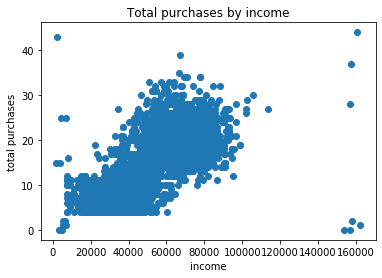

In [136]:
# plot a scatter plot with income and total_purchases
plt.scatter(df["income"], df["total_purchases"])
plt.xlabel("income")
plt.ylabel("total purchases")
plt.title("Total purchases by income")
plt.show()

In [137]:
# print pearson correlation coefficient between income and total_purchases
df["income"].corr(df["total_purchases"])

0.6704130336461037

es gibt einen starken positiven Zusammenhang zwischen income und total_purchases

#### These: jüngere Menschen kaufen mehr im Web und weniger im Katalog

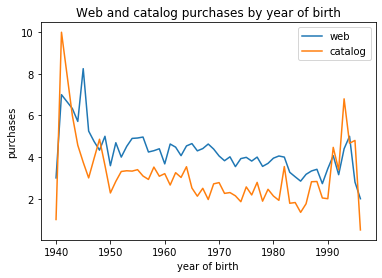

In [138]:


# multipline plot
# plot a line chart with year_birth and web purchases
# plot a line chart with year_birth and catalog purchases

plt.plot(df.groupby("year_birth")["numwebpurchases"].mean(), label="web")
plt.plot(df.groupby("year_birth")["numcatalogpurchases"].mean(), label="catalog")
plt.xlabel("year of birth")
plt.ylabel("purchases")
plt.title("Web and catalog purchases by year of birth")
plt.legend()
plt.show()

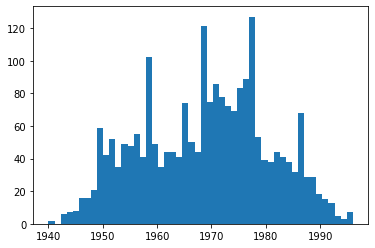

In [139]:
# plot a histogram with year_birth
plt.hist(df["year_birth"], bins=50)
plt.show()

These stimmt offenbar nicht, da die Katalogkäufe in allen Altersgruppen gleichmäßig verteilt sind

#### These: ältere Menschen kaufen mehr Wein, jüngere Menschen mehr Süßigkeiten

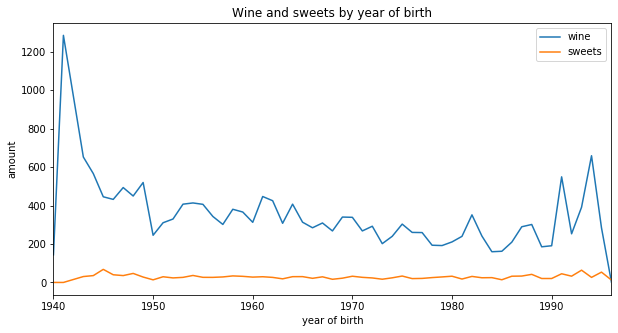

In [140]:
# show amount of wine (mntwines) and sweets (mntsweetproducts) by year of birth
df.groupby("year_birth")["mntwines"].mean().plot(kind="line", label="wine")
df.groupby("year_birth")["mntsweetproducts"].mean().plot(kind="line", label="sweets")
plt.xlabel("year of birth")
plt.ylabel("amount")
plt.title("Wine and sweets by year of birth")
plt.legend()
#make chart bigger
plt.gcf().set_size_inches(10, 5)
plt.show()

tendenziell stimmt die These, aber es gibt nur einen sehr schwachen Zusammenhang

#### These: Menschen mit höherem Einkommen kaufen mehr Wein

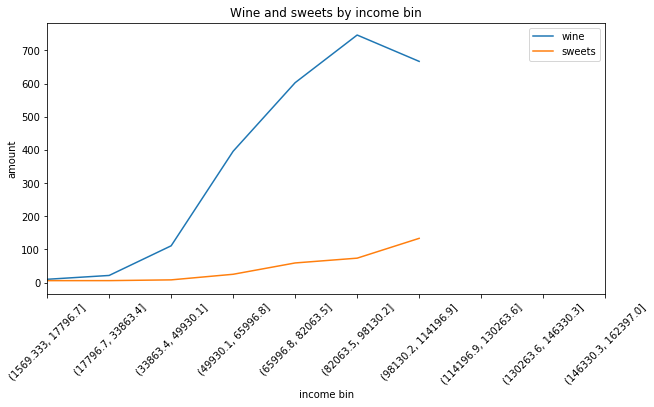

In [141]:
# create ten bins for income
df["income_bin"]=pd.cut(df["income"], bins=10)

# show the amounts of sweets and wine by income bin
df.groupby("income_bin")["mntwines"].mean().plot(kind="line", label="wine")
df.groupby("income_bin")["mntsweetproducts"].mean().plot(kind="line", label="sweets")
plt.xlabel("income bin")
plt.ylabel("amount")
# rotate xticks
plt.xticks(rotation=45)
plt.title("Wine and sweets by income bin")
plt.legend()
# make chart bigger
plt.gcf().set_size_inches(10, 5)
plt.show()

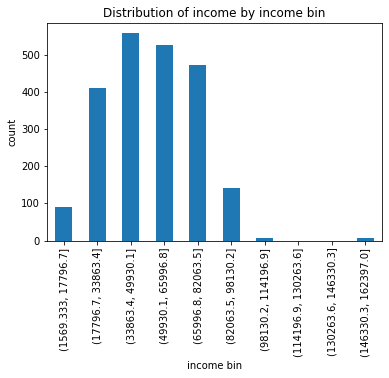

In [142]:
# show the distribution of income by income bin
df.groupby("income_bin")["income"].count().plot(kind="bar")
plt.xlabel("income bin")
plt.ylabel("count")
plt.title("Distribution of income by income bin")
plt.show()

In [143]:
# remove rows with income > 100000
df=df[df["income"]<100000]

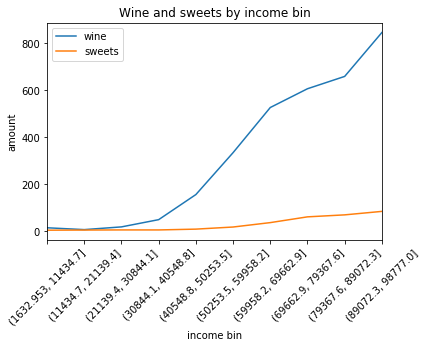

In [144]:
# create ten bins for income
df["income_bin"]=pd.cut(df["income"], bins=10)

# show the amounts of sweets and wine by income bin
df.groupby("income_bin")["mntwines"].mean().plot(kind="line", label="wine")
df.groupby("income_bin")["mntsweetproducts"].mean().plot(kind="line", label="sweets")
plt.xlabel("income bin")
plt.ylabel("amount")
# rotate xticks
plt.xticks(rotation=45)
plt.title("Wine and sweets by income bin")
plt.legend()
plt.show()

In [146]:
# print pearson correlation coefficient between income and wine
df["income"].corr(df["mntwines"])

0.7339149618337976

Die These kann definitiv bestätigt werden

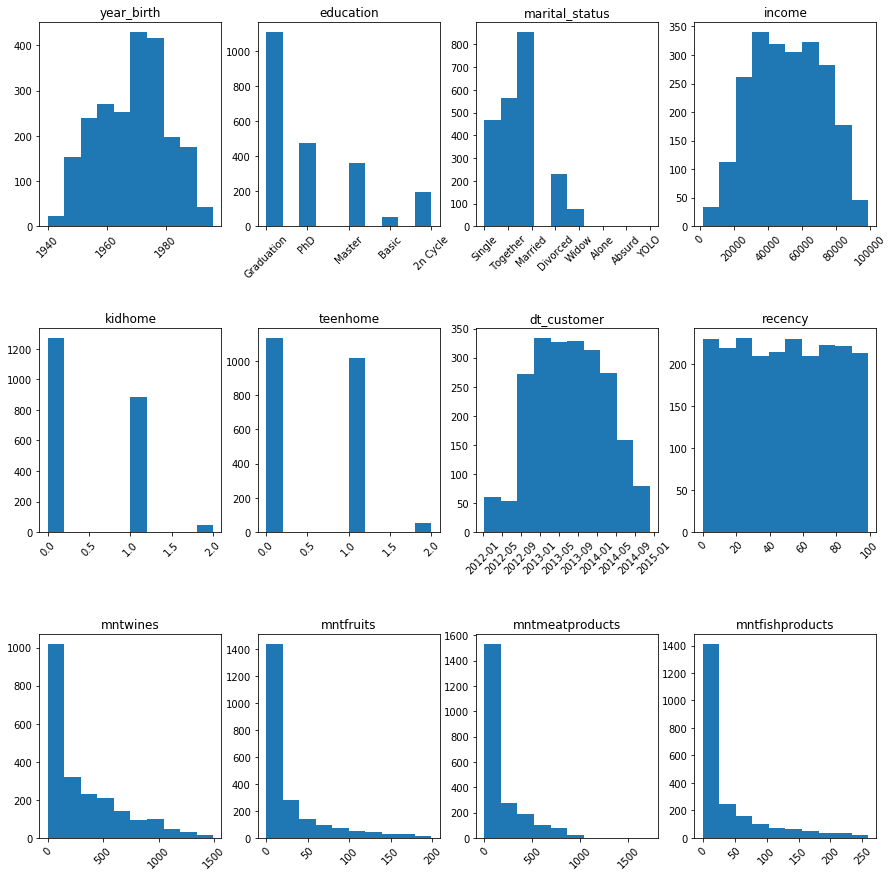

In [158]:
cols=df.columns[:12]
plt.figure(figsize=(15,15))

for i in range(1, len(cols)+1):
    plt.subplot(3, 4, i)
    plt.hist(df[cols[i-1]])
    plt.title(cols[i-1])
    #rotate xticks
    plt.xticks(rotation=45)
    # increase space between subplots
    plt.subplots_adjust(hspace=0.5)
plt.show()




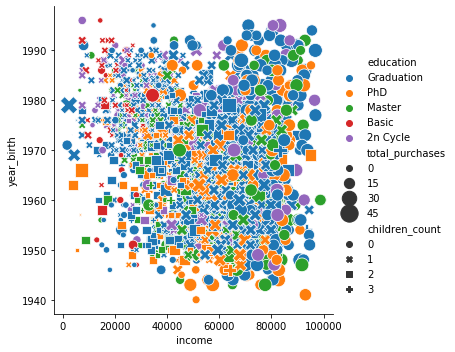

In [170]:
import seaborn as sns

sns.relplot(x="income", y="year_birth", hue="education", size="total_purchases", sizes=(1,300), style="children_count", data=df)
plt.show()

In [168]:
df.head()

,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mntwines,mntfruits,...,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,z_costcontact,z_revenue,response,children_count,total_purchases,income_bin
0,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,88,...,0,0,0,0,3,11,1,0,25,"(50253.5, 59958.2]"
1,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,1,...,0,0,0,0,3,11,0,2,6,"(40548.8, 50253.5]"
2,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,...,0,0,0,0,3,11,0,0,21,"(69662.9, 79367.6]"
3,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,4,...,0,0,0,0,3,11,0,1,8,"(21139.4, 30844.1]"
4,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,...,0,0,0,0,3,11,0,1,19,"(50253.5, 59958.2]"
